In [1]:
import xarray as xr
import fsspec
import os
import rioxarray
import rasterio

In [2]:
path = (
    "s3://eodata/Sentinel-3/SYNERGY/SY_2_SYN___/2025/07/06/S3B_SY_2_SYN"
    "____20250706T233058_20250706T233358_20250708T043306_0179_108_258_"
    "3420_ESA_O_NT_002.SEN3/Syn_Oa01_reflectance.nc"
)

In [3]:
%%time
fs = fsspec.filesystem(
    "s3",
    anon=False,
    key="O0M0CUQIDQO9TDZ4D8NR",
    secret="qPUyXs9G6j8on6MY5KPhQNHuA5uZTqxEscrbBCGx",
    client_kwargs={"endpoint_url": "https://eodata.dataspace.copernicus.eu"},
)

CPU times: user 51.6 ms, sys: 15 ms, total: 66.6 ms
Wall time: 67 ms


In [4]:
%%time
fs.size(path)/1e6

CPU times: user 41.8 ms, sys: 21.8 ms, total: 63.6 ms
Wall time: 220 ms


13.604717

In [5]:
%%time
ds = xr.open_dataset(fs.open(path), chunks={})
ds

CPU times: user 163 ms, sys: 63.6 ms, total: 226 ms
Wall time: 1.46 s


<xarray.Dataset> Size: 159MB
Dimensions:       (rows: 4091, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    SDR_Oa01      (rows, columns) float32 80MB dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    SDR_Oa01_err  (rows, columns) float32 80MB dask.array<chunksize=(1023, 1217), meta=np.ndarray>
Attributes: (12/15)
    absolute_orbit_number:  37490
    comment:                 
    contact:                eosupport@copernicus.esa.int
    creation_time:          2025-07-08T04:33:06Z
    history:                  2025-07-08T04:33:06Z: PUGCoreProcessor /data/WO...
    institution:            ESA
    ...                     ...
    references:             S3IPF PDS 006 - i1r16 - Product Data Format Speci...
    resolution:             [ 300 300 ]
    source:                 IPF-SY-2 06.30
    start_time:             2025-07-06T23:30:58.080919Z
    stop_time:              2025-07-06T23:33:58.048821Z
    title:                  SYN L2, surface directional reflectance associate...

In [6]:
ds.SDR_Oa01.encoding

{'chunksizes': (1023, 1217),
 'fletcher32': False,
 'shuffle': True,
 'preferred_chunks': {'rows': 1023, 'columns': 1217},
 'zlib': True,
 'complevel': 2,
 'source': '<File-like object S3FileSystem, eodata/Sentinel-3/SYNERGY/SY_2_SYN___/2025/07/06/S3B_SY_2_SYN____20250706T233058_20250706T233358_20250708T043306_0179_108_258_3420_ESA_O_NT_002.SEN3/Syn_Oa01_reflectance.nc>',
 'original_shape': (4091, 4865),
 'dtype': dtype('int16'),
 '_FillValue': np.int16(-10000),
 'scale_factor': np.float32(1e-04)}

In [7]:
%%time
ds.SDR_Oa01.compute()

CPU times: user 285 ms, sys: 116 ms, total: 401 ms
Wall time: 316 ms


<xarray.DataArray 'SDR_Oa01' (rows: 4091, columns: 4865)> Size: 80MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]],
      shape=(4091, 4865), dtype=float32)
Dimensions without coordinates: rows, columns
Attributes:
    ancillary_variables:  SDR_Oa01_err
    bandwidth:            15.0
    long_name:            Surface directional reflectance associated with OLC...
    standard_name:        surface_directional_reflectance
    valid_max:            10000
    valid_min:            0
    wavelength:           400.0

CPU times: user 466 ms, sys: 39 ms, total: 505 ms
Wall time: 500 ms


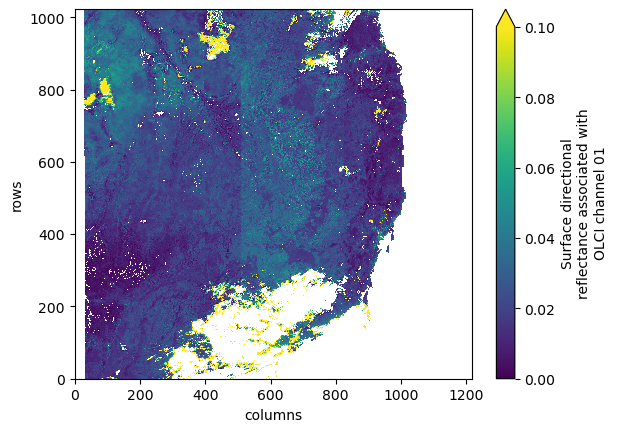

In [8]:
%%time
ds.SDR_Oa01[::4, ::4].plot(vmax=0.1)